**The year 2023 saw a sizable number of mass layoffs occur across a variety of industries. Numerous people have lost their employment and are now fighting to make ends meet as a result of these huge layoffs, which have had a significant effect on the worldwide economy. Let's examine the data in detail to gain more knowledge.**

Dataset Link : [Layoffs Dataset 2023](https://layoffs.fyi/)

#Importing necessary libraries

In [2]:
!pip install plotly_express

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
palette = sns.color_palette("rainbow", 8)

#Importing Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/layoffs_data.csv")
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown


#Data Preprocessing
Printing the number of rows and columns

In [5]:
df.shape

(2738, 12)

In [6]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


Checking the null values

In [7]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

Dropping the rows with no layoff count

In [8]:
df = df[df['Laid_Off_Count'].notna()]

Collecting the year value from the data column and making a column for the same

In [9]:
def get_year(date):
    return date.split("-")[0]
df['Year'] = df['Date_Added'].apply(get_year)
layoff_year_list = list(df['Year'])

In [10]:
df['year_of_laidOff'] = layoff_year_list

Dropping the unnecessary columns



In [11]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

Printing the head of the dataframe

In [12]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,Year,year_of_laidOff
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0,2023,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0,2023,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0,2023,2023
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,2023,2023
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,2023,2023


#Visualising Data
Plotting layoff count vs years and mass layoff in last four years

<ipython-input-13-9f2badaf5719>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()


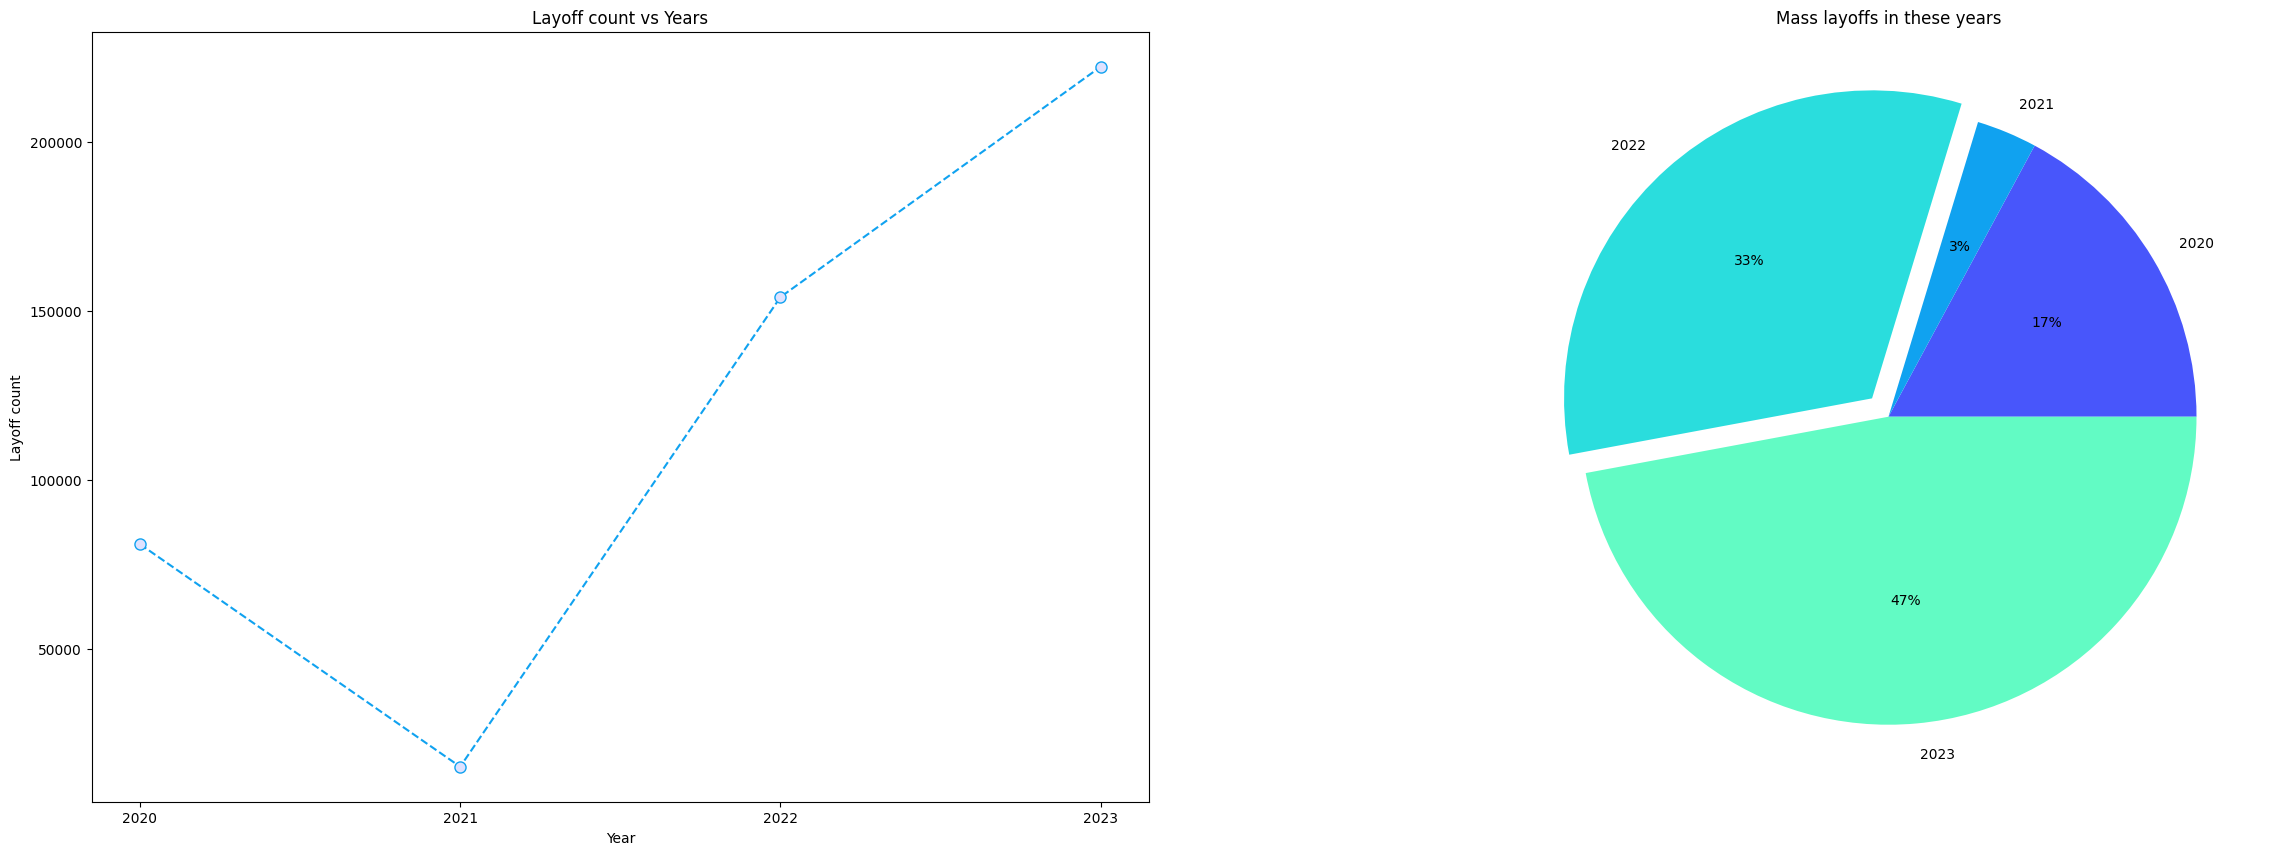

In [13]:
plt.figure(figsize=(30, 10))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in these years")

plt.show()

Visualising top 10 countries with most layoffs using a pie chart

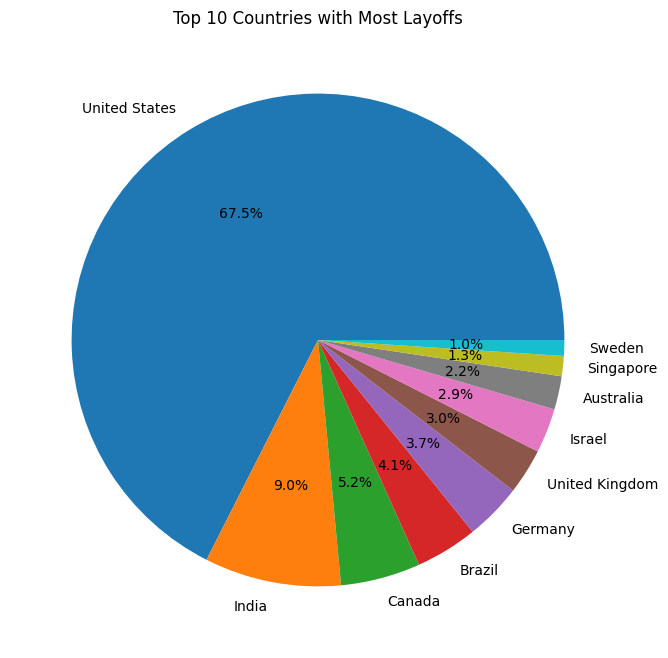

In [14]:
plt.figure(figsize=(28,8))
top_countries = df['Country'].value_counts().head(10)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Top 10 Countries with Most Layoffs')
plt.show()

Checking whether companies layed off 100% of their employees

In [15]:
layoff_100 = df.loc[df['Percentage'] == 1].dropna()
layoff_100

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,Year,year_of_laidOff
22,Bitwise,SF Bay Area,Crypto,1.0,2023-06-14,84.0000,Series B,United States,900.0,2023,2023
232,Milkrun,Sydney,Food,1.0,2023-04-11,86.0000,Series A,Australia,400.0,2023,2023
461,Dropp,Berlin,Retail,1.0,2023-02-14,2.0000,Unknown,Germany,60.0,2023,2023
511,Openpay,Melbourne,Finance,1.0,2023-02-07,299.0000,Post-IPO,Australia,83.0,2023,2023
710,Britishvolt,London,Transportation,1.0,2023-01-17,2400.0000,Unknown,United Kingdom,206.0,2023,2023
1076,Deliveroo Australia,Melbourne,Food,1.0,2022-11-15,1700.0000,Post-IPO,Australia,120.0,2022,2022
1160,Planetly,Berlin,Other,1.0,2022-11-04,5.0000,Acquired,Germany,200.0,2022,2022
1208,Fifth Season,Pittsburgh,Food,1.0,2022-10-28,35.0000,Series B,United States,100.0,2022,2022
1266,Playdots,New York City,Consumer,1.0,2022-10-13,10.0000,Acquired,United States,65.0,2022,2022
1331,Kitty Hawk,SF Bay Area,Aerospace,1.0,2022-09-21,1.0000,Unknown,United States,100.0,2022,2022


In [16]:
layoff_100.shape

(40, 11)

#There are around 36 companies with 100% layoff rate

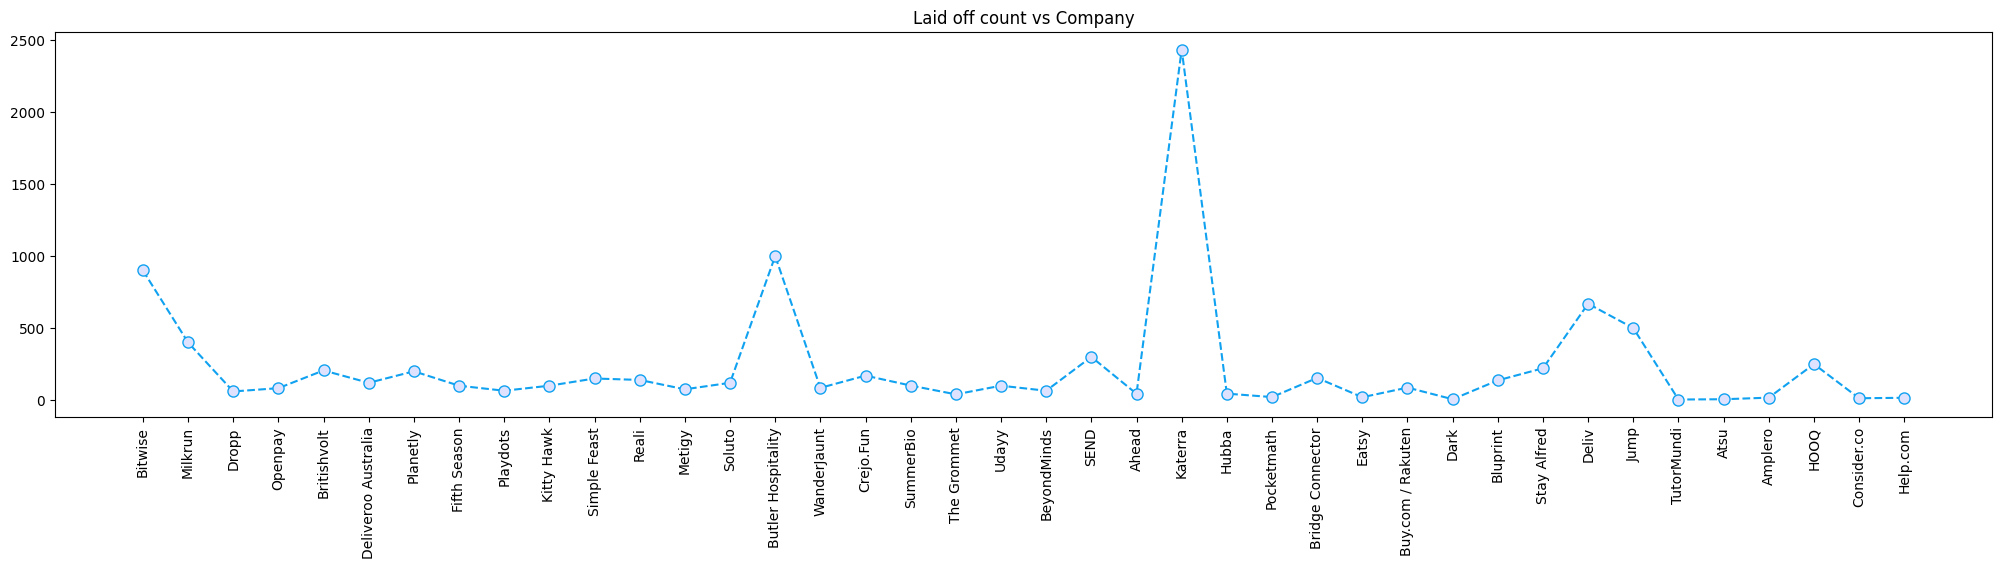

In [17]:
plt.figure(figsize=(25,5))
plt.plot('Company', 'Laid_Off_Count', marker="o", linestyle='--', color='#10a2f0',
         markerfacecolor='#dfe2ff', markersize=8, data=layoff_100)
plt.xticks(rotation = 90)
plt.title("Laid off count vs Company")
plt.show()

Visualising the locations of the companies with 100% layoff rate in map

In [18]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="layoff_data")
locations = layoff_100['Location_HQ'].dropna()
latitudes = locations.apply(lambda loc: geolocator.geocode(loc).latitude)
longitudes = locations.apply(lambda loc: geolocator.geocode(loc).longitude)

fig = px.scatter_mapbox(layoff_100, lat=latitudes, lon=longitudes,
                        hover_name='Location_HQ', hover_data=['Laid_Off_Count', 'Company'],
                        color='Laid_Off_Count', size='Laid_Off_Count',
                        color_continuous_scale=px.colors.sequential.Cividis,
                        zoom=1, center={'lat':10, 'lon':30},
                        height=400, width=1400,
                        mapbox_style='carto-positron')
fig.update_layout(title_text='Population of each cities', margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

Dividing the dataframe into 4 groups according to their layoff count 35,35-75,75-160,160-11000

In [19]:
grp1 = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2 = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 75)]
grp3 = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 160)]
grp4 = df.loc[(df['Laid_Off_Count'] > 160)]

Plotting a chart showing different types of industries in group 4(layoff>160)

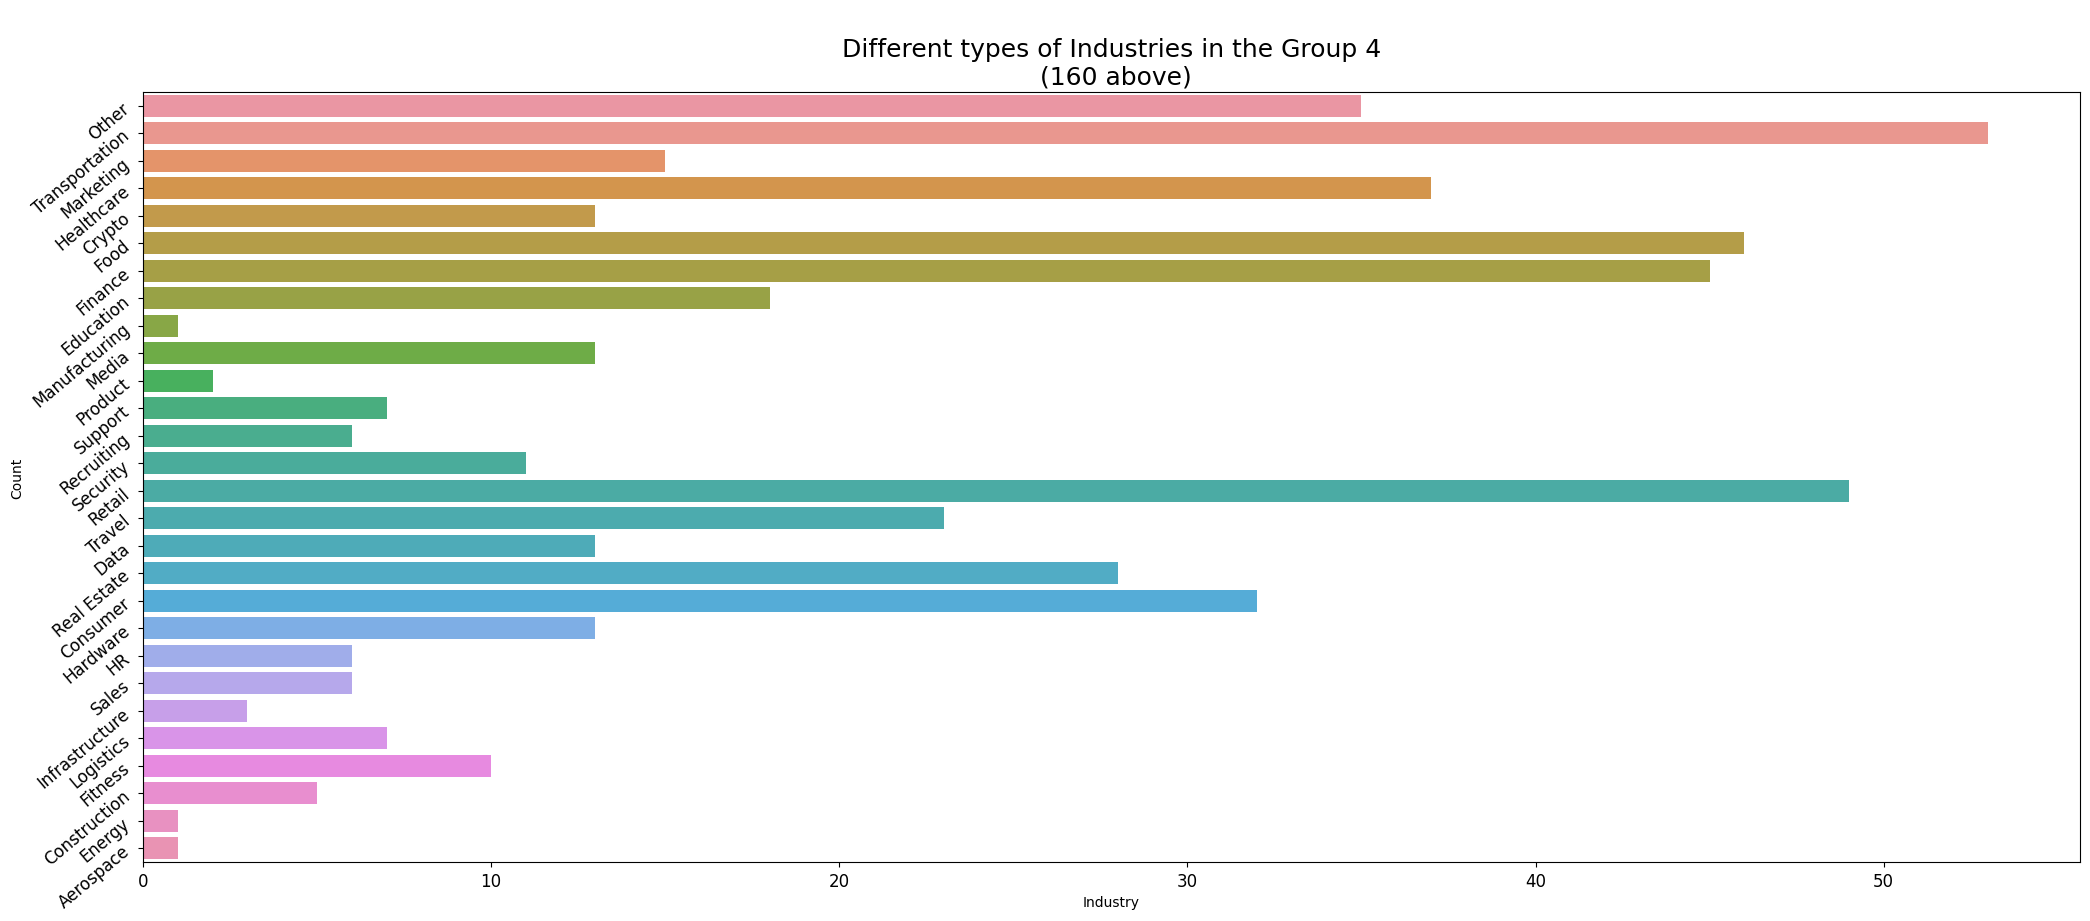

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(y='Industry', data=grp4)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n (160 above)", fontsize=18)

plt.show()

Plotting a table representing top 10 companies with most layoffs in group 4

In [21]:
top10_comp = grp4.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,Year,year_of_laidOff
651,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023,2023
1126,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022,2022
1058,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022,2022
684,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023,2023
328,Meta,SF Bay Area,Consumer,NaN,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023,2023
311,Amazon,Seattle,Retail,NaN,2023-03-20,108.0,Post-IPO,United States,9000.0,2023,2023
397,Ericsson,Stockholm,Other,0.08,2023-02-24,663.0,Post-IPO,Sweden,8500.0,2023,2023
824,Amazon,Seattle,Retail,0.02,2023-01-04,108.0,Post-IPO,United States,8000.0,2023,2023
825,Salesforce,SF Bay Area,Sales,0.10,2023-01-04,65.0,Post-IPO,United States,8000.0,2023,2023
193,Flink,Berlin,Food,0.40,2023-04-24,1000.0,Series B,Germany,8000.0,2023,2023


Plotting a chart showing layoffs in top 10 companies and their locations

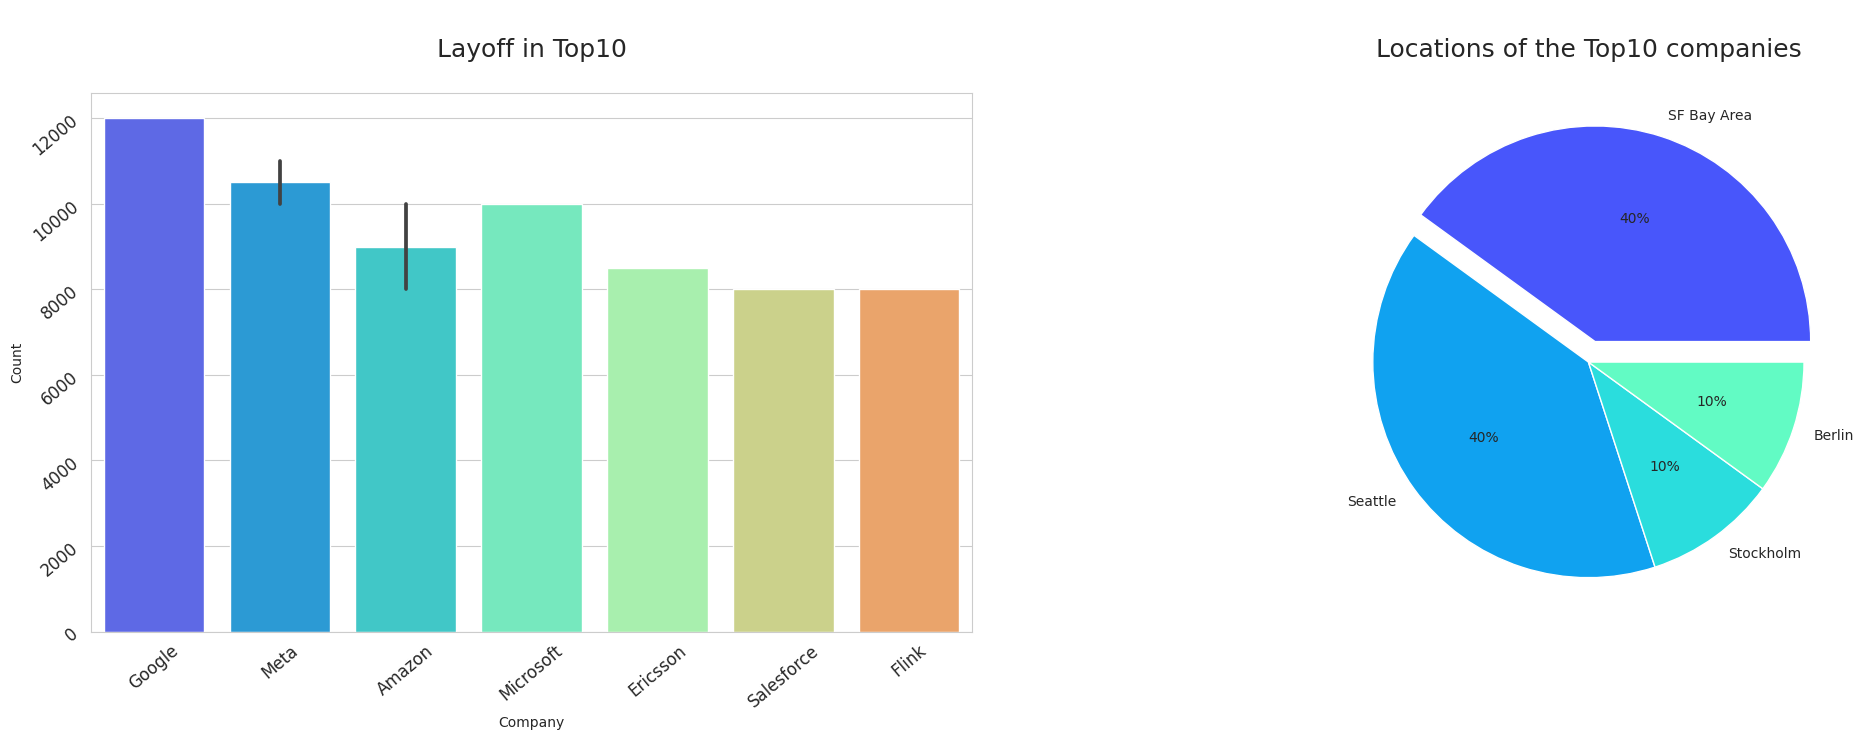

In [25]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
loc_counts = top10_comp['Location_HQ'].value_counts()
explode = [0.1] + [0]*(len(loc_counts)-1)
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = explode, colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

Top 15 fund raised companies having layoffs

<ipython-input-23-0958f4f92809>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




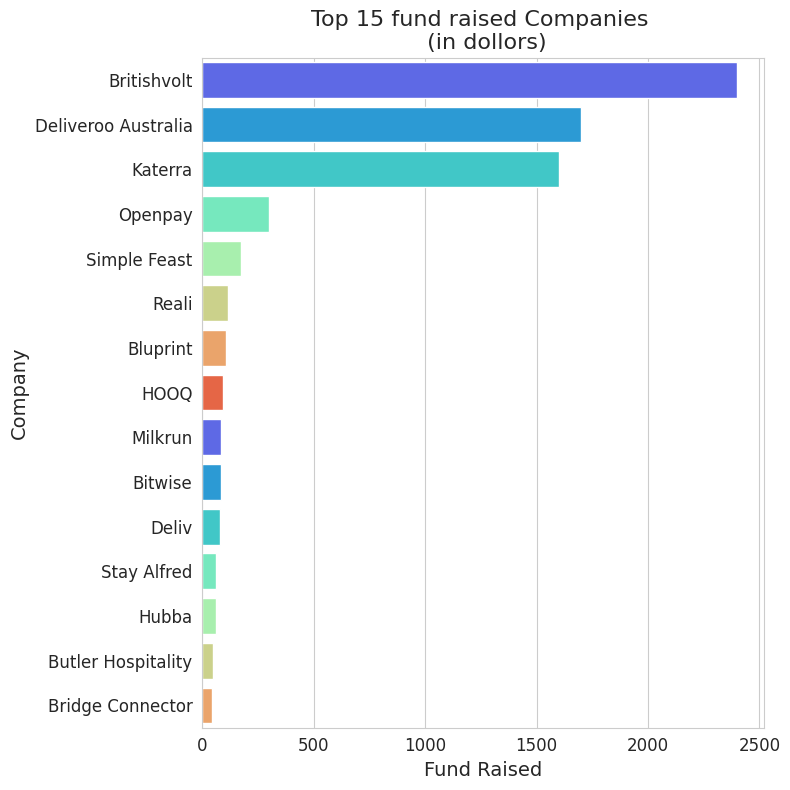

In [23]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 8))

top15_comp = layoff_100.sort_values(by='Funds_Raised', ascending=False)[:15]

sns.barplot(x='Funds_Raised', y='Company', data=top15_comp, palette=palette, ci=None)

plt.xlabel('Fund Raised', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.title("Top 15 fund raised Companies \n (in dollors)", fontsize=16)

plt.tight_layout()
plt.show()

#Conclusion

The review of the 2023 layoff data analysis can yield a number of insights.

 - First, we discovered that there were more layoffs overall than in prior years, with the technology sector experiencing the biggest number of layoffs.
 - Second, we identified a handful of businesses, like Amazon, Google, and Microsoft, that have experienced a large number of layoffs. The economy may be negatively impacted by these companies' layoffs because they are major participants in the tech sector.
 - Thirdly, we found that the United States, India, and Canada are the countries most heavily impacted by layoffs.
 - The location of the laid-off workers was finally mapped using geographic visualization, which showed clusters of layoffs in several cities.